In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def is_result_marks(row):
    return (row['Status'] + row["Encouragement"]) - row['Reprimand']

In [3]:
df1 = pd.read_csv("attendance.csv")
df2 = pd.read_csv("statistics.csv")

In [4]:
df1

,Date,Name,Group,Status
0,06_08_2023,Баталов Сайд-Магомед,Python pro 16,1
1,06_08_2023,Исаев Исмаил,Python pro 16,1
2,06_08_2023,Тайдаев Абдуррахьман,Python pro 16,1
3,06_08_2023,Тайдаев Абубакар,Python pro 16,1
4,07_08_2023,Баталов Сайд-Магомед,Python pro 16,1
...,...,...,...,...
136,13_08_2023,Лорасанова Ирсана,Django 1,1
137,13_08_2023,Чермоев Мовсар,Django 1,1
138,13_08_2023,Хахаев Ислам,Django 1,1
139,13_08_2023,Мусипов Юсуп,Django 1,1


In [5]:
df2

,Date,Name,Group,Encouragement,Reprimand
0,10_08_2023,Абубакаров Рамзан,Python start 6,0,0.0
1,10_08_2023,Ганжуев Джабраил,Python start 6,0,0.0
2,10_08_2023,Тайсумов Халид,Python start 6,0,0.5
3,10_08_2023,Цинкаев Амир,Python start 6,0,0.0
4,10_08_2023,Эльжуркаева Асет,Python start 6,0,0.0
5,10_08_2023,Денаев Халид,Python start 6,0,0.0
6,10_08_2023,Мациев Дени,Python start 6,0,0.0
7,10_08_2023,Магомадов Ахьмад,Python start 6,0,0.0
8,12_08_2023,Баталов Сайд-Магомед,Python pro 16,0,0.0
9,12_08_2023,Исаев Исмаил,Python pro 16,0,0.0


In [6]:
df3 = pd.merge(df1, df2, how='outer')
df3 = df3.fillna(0)

In [7]:
df3

,Date,Name,Group,Status,Encouragement,Reprimand
0,06_08_2023,Баталов Сайд-Магомед,Python pro 16,1.0,0.0,0.0
1,06_08_2023,Исаев Исмаил,Python pro 16,1.0,0.0,0.0
2,06_08_2023,Тайдаев Абдуррахьман,Python pro 16,1.0,0.0,0.0
3,06_08_2023,Тайдаев Абубакар,Python pro 16,1.0,0.0,0.0
4,07_08_2023,Баталов Сайд-Магомед,Python pro 16,1.0,0.0,0.0
...,...,...,...,...,...,...
164,10_08_2023,Магомадов Ахьмад,Python start 6,0.0,0.0,0.0
165,13_08_2023,Баталов Сайд-Магомед,Python pro 16,0.0,0.0,0.0
166,13_08_2023,Исаев Исмаил,Python pro 16,0.0,0.0,0.0
167,13_08_2023,Тайдаев Абдуррахьман,Python pro 16,0.0,0.0,0.0


In [8]:
df3['result'] = df3.apply(is_result_marks, axis=1)

In [9]:
df4 = df3.groupby(by="Name")['result'].sum().sort_values(ascending=False)

<Axes: ylabel='Name'>

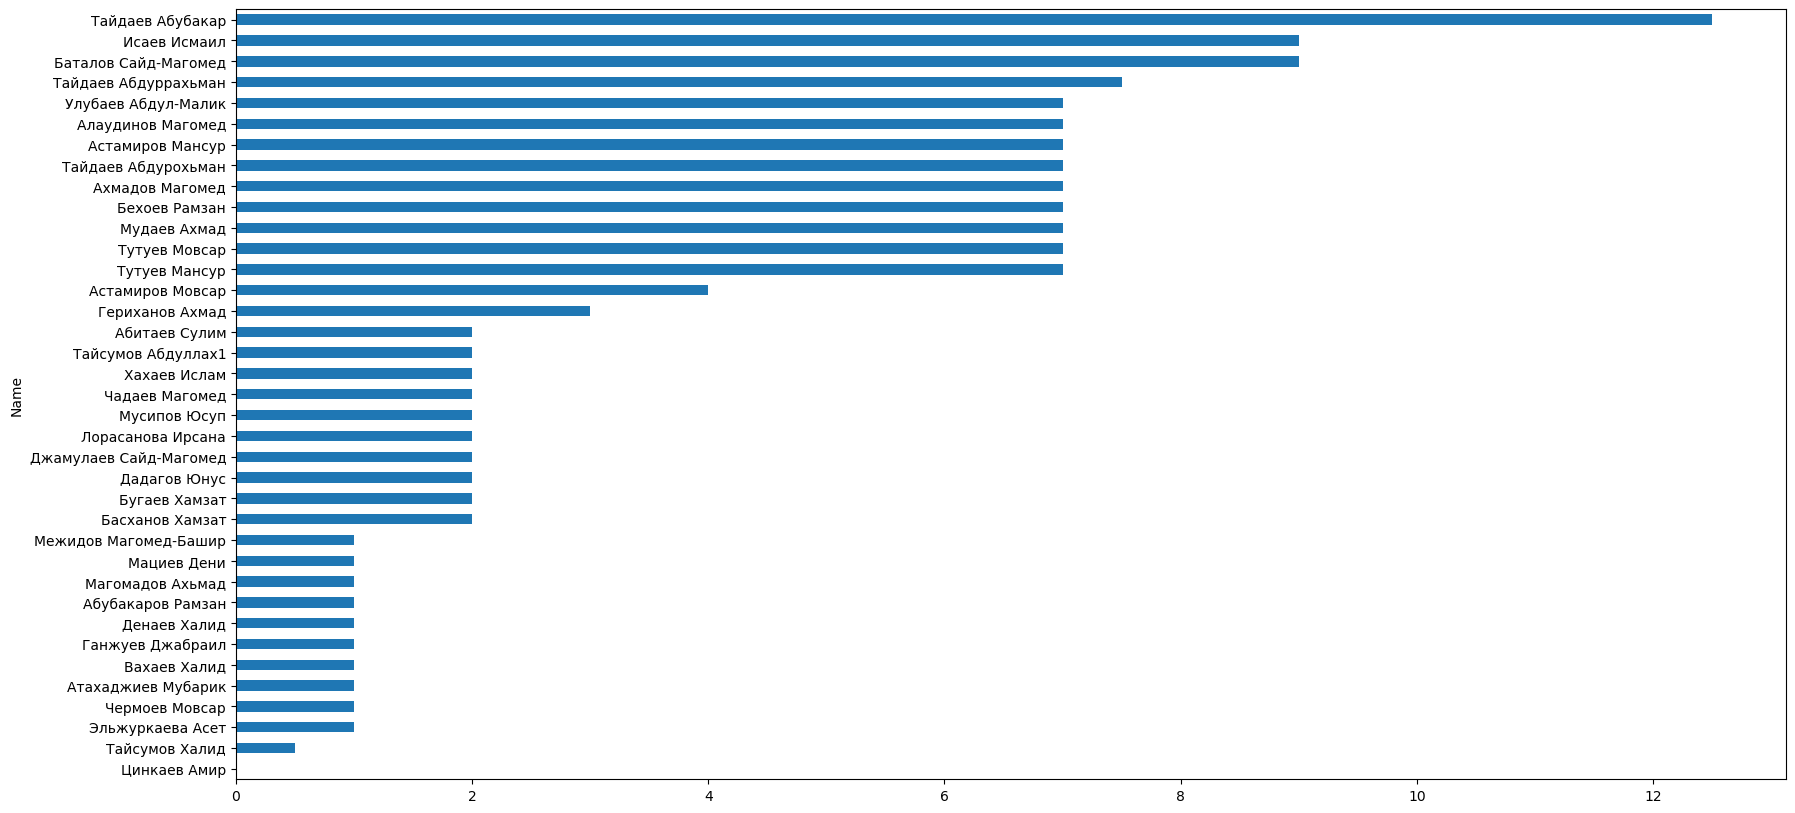

In [10]:
df4[::-1].plot(kind='barh', figsize=(20, 10))